# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

Fill missing values with median of that particular column

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

# Breast cancer dataset

In [33]:
### Import all required packages

## for performing basic math operations
import numpy as np

## for loading and handling data
import pandas as pd

## for getting critical values(isf) and p-value(cdf)
import scipy.stats as stats

## for splitting data
from sklearn.model_selection import train_test_split

## for scaling the data
from sklearn.preprocessing import StandardScaler

## for finding the accuracy score
from sklearn.metrics import accuracy_score

## for the ML algorithm
from sklearn.neighbors import KNeighborsClassifier

## to analyse the confusion matrix
from sklearn.metrics import confusion_matrix

## for visualizations and plotting of data
from matplotlib import pyplot as plt
#  for more beautification?
import seaborn as sns

## to handle warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


## Read data

### Question 1
Read the data given in bc2.csv file

In [2]:
bcData = pd.read_csv("bc2.csv")
bcData.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [3]:
bcData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [4]:
bcData.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [5]:
pd.isna(bcData).describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699,699,699,699,699,699,699,699,699,699,699
unique,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False
freq,699,699,699,699,699,699,699,699,699,699,699


In [6]:
pd.isnull(bcData).describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699,699,699,699,699,699,699,699,699,699,699
unique,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False
freq,699,699,699,699,699,699,699,699,699,699,699


KG : since for all the columns number of unique values in both the cases of missing and null values is 1 and there's only one value "False", there are no missing values and null values

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [7]:
print("There are",bcData[bcData['Bare Nuclei']=='?']['Bare Nuclei'].count(),"'?' in the 'Bare Nuclei' feature")

There are 16 '?' in the 'Bare Nuclei' feature


#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [8]:
topValue = bcData['Bare Nuclei'].describe(include='all').top
print(topValue)

1


In [9]:
bcData['Bare Nuclei'].replace('?',topValue,inplace=True)

In [10]:
print("There are",bcData[bcData['Bare Nuclei']=='?']['Bare Nuclei'].count(),"'?' in the 'Bare Nuclei' feature")

There are 0 '?' in the 'Bare Nuclei' feature


In [11]:
#bcData.describe()
bcData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [12]:
# 'Bare Nuclei' is still object.
# have to be converted to integer
bcData['Bare Nuclei']= pd.to_numeric(bcData['Bare Nuclei'])
bcData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


### Question 5
#### Find the distribution of target variable (Class) 

In [13]:
bcData['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

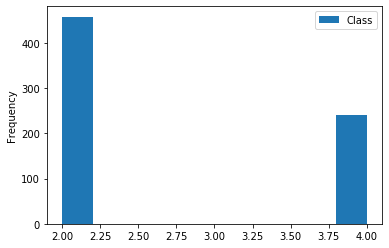

In [14]:
bcData['Class'].plot(kind='hist',legend=True)

#### Convert the datatype of Bare Nuclei to `int`

In [15]:
# already done above

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

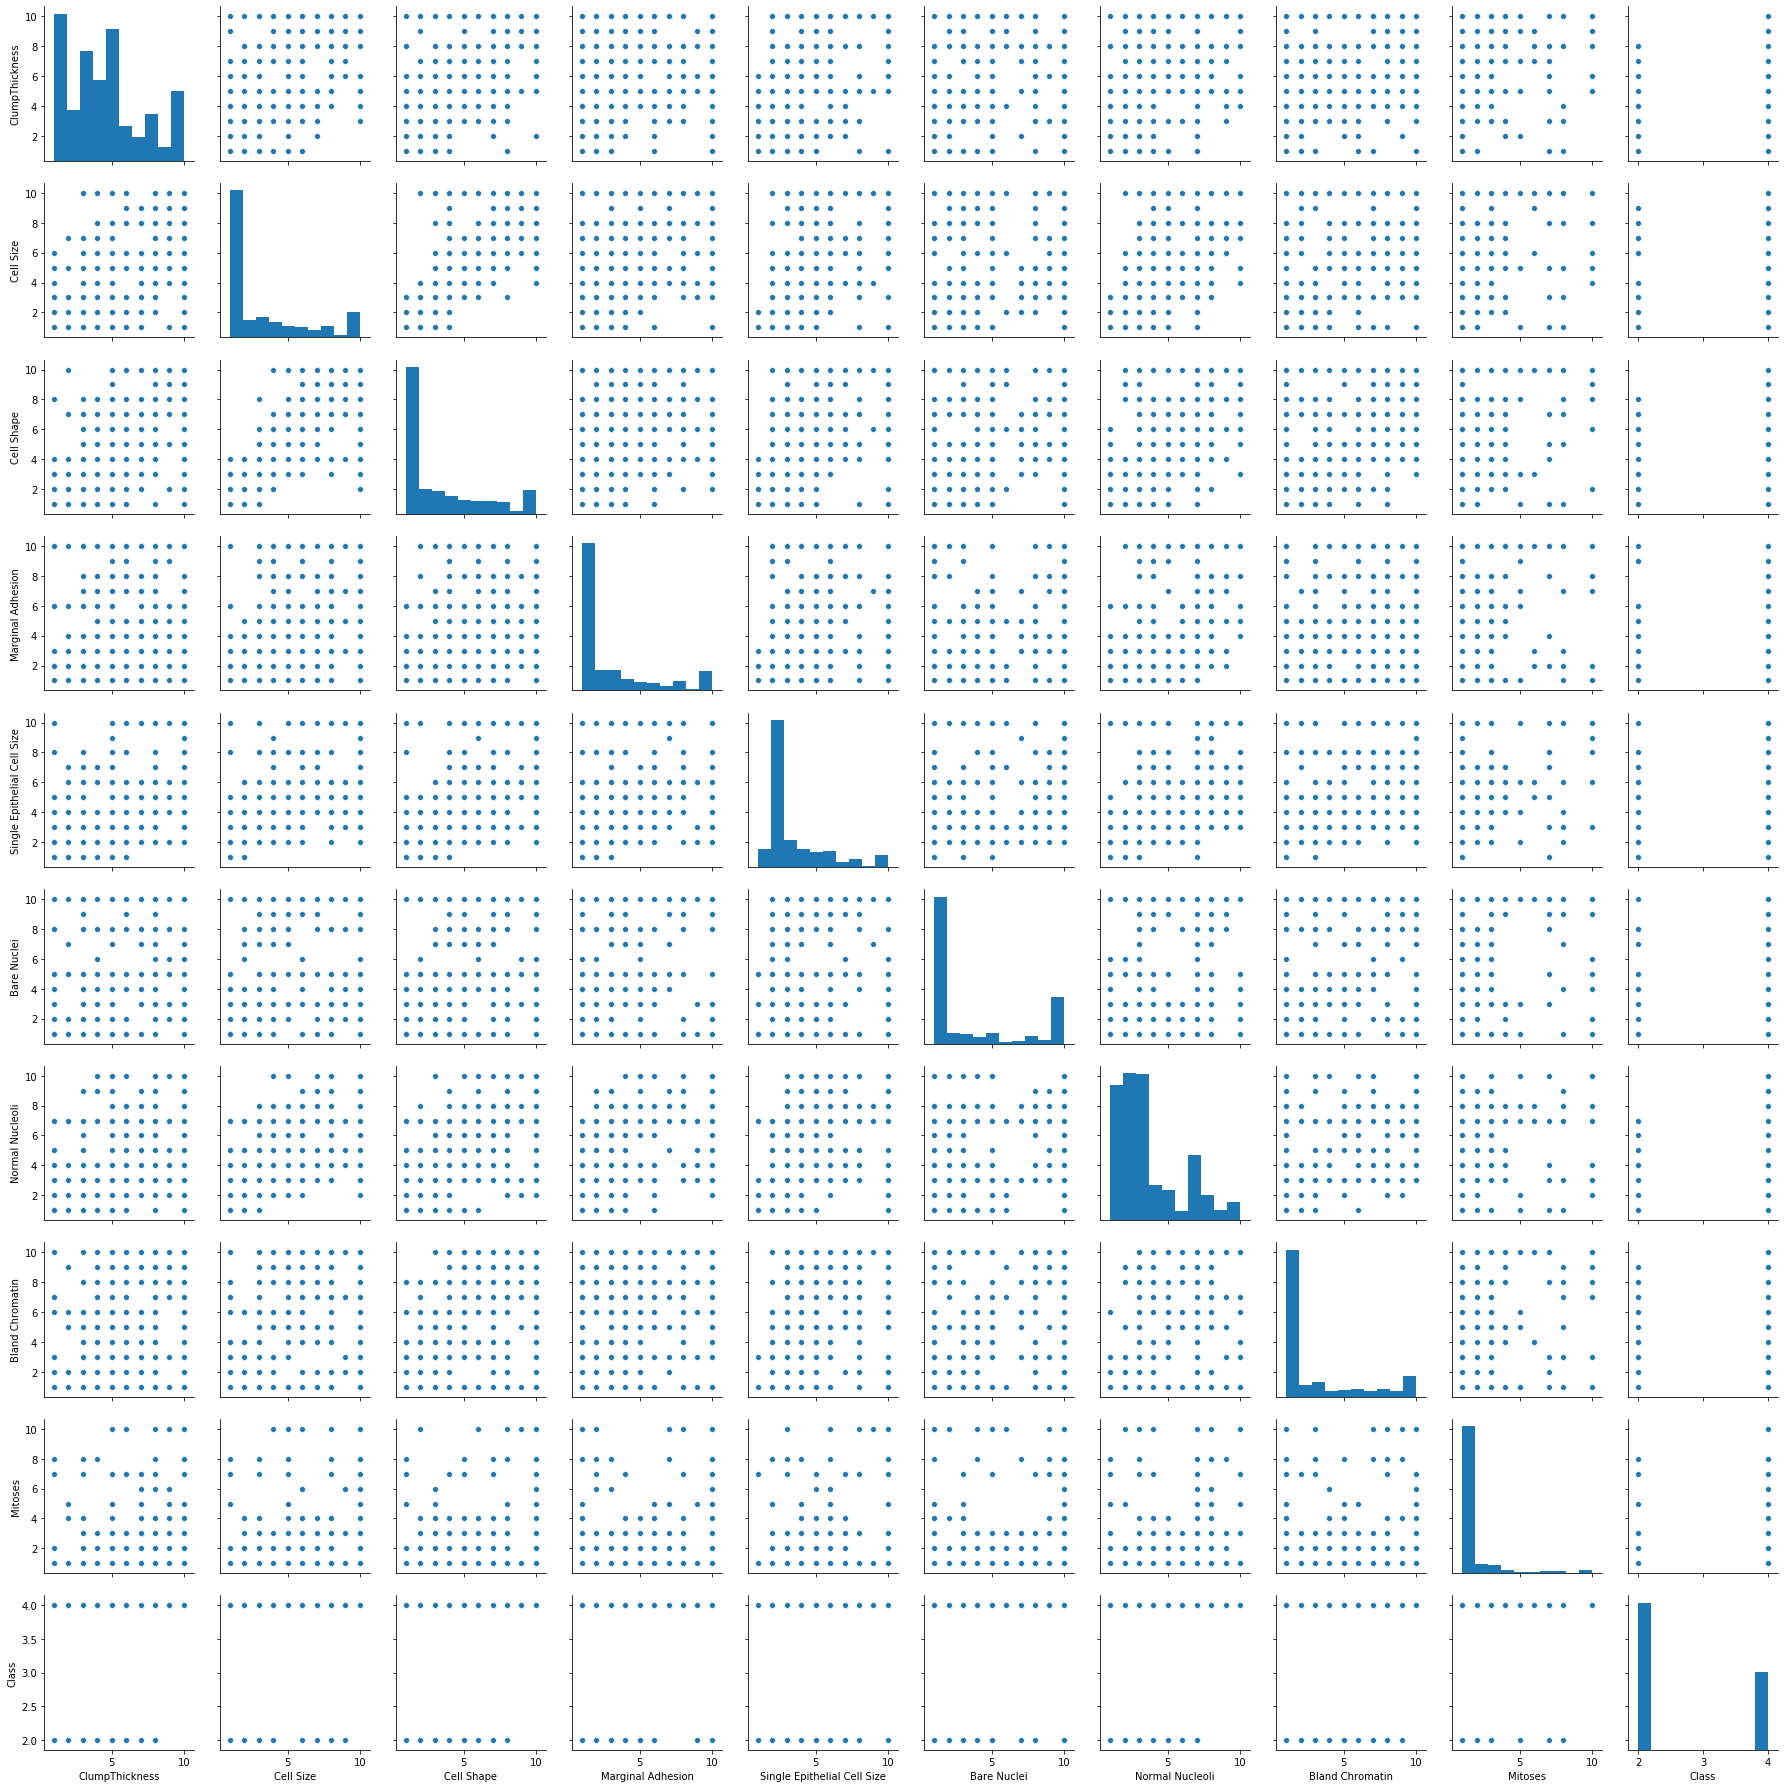

In [16]:
bcDataWorking = bcData.copy()
bcDataWorking.drop(labels=['ID'],axis=1,inplace=True)
sns.pairplot(bcDataWorking)

In [17]:
bcDataWorking.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


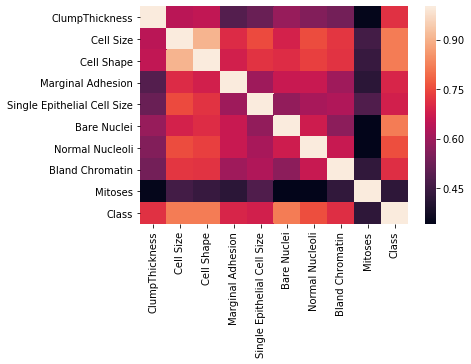

In [18]:
sns.heatmap(bcDataWorking.corr())

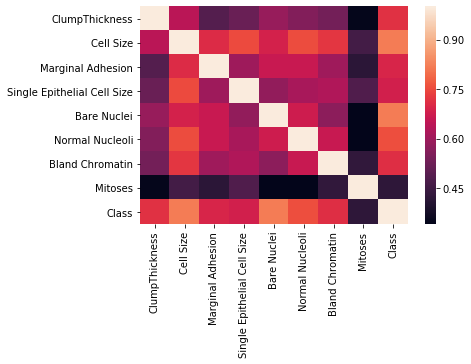

In [19]:
bcDataWorking.drop(labels=['Cell Shape'],axis=1,inplace=True)
sns.heatmap(bcDataWorking.corr())

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [25]:
X = bcDataWorking.drop('Class',axis=1)
Y = bcDataWorking['Class']

#### Divide the Training and Test sets in 70:30 

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [27]:
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [60]:

for k in [3,5,9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,Y_train)
    print("For k =",k)
    print("The Testing Accuracy",knn.score(scaledX_test,Y_test))
    print("The Training Accuracy",knn.score(scaledX_train,Y_train))
    print("\n")
    Y_pred = knn.predict(scaledX_test)
    print("Accuracy Score ",accuracy_score(Y_test,Y_pred))



For k = 3
The Testing Accuracy 0.9714285714285714
The Training Accuracy 0.9734151329243353


Accuracy Score  0.9714285714285714
For k = 5
The Testing Accuracy 0.9666666666666667
The Training Accuracy 0.9734151329243353


Accuracy Score  0.9666666666666667
For k = 9
The Testing Accuracy 0.9666666666666667
The Training Accuracy 0.967280163599182


Accuracy Score  0.9666666666666667


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [68]:
neighbors = np.arange(1, 20,step=2)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(30):
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        
        knn = KNeighborsClassifier(n_neighbors=k)
        
        knn.fit(scaledX_train,Y_train)
        
        
        Y_pred = knn.predict(scaledX_test)
        #print("Accuracy Score ",accuracy_score(Y_test,Y_pred))
        train.append(knn.score(scaledX_train,Y_train))
        #train.append(accuracy_score(Y_train,Y_pred))
        #test.append(knn.score(scaledX_test,Y_test))
        test.append(accuracy_score(Y_test,Y_pred))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)

for i,k in enumerate(neighbors):
    print("K = ",k,": Train accuracy = ",train_accuracy_plot[i],"Test accuracy = ",test_accuracy_plot[i],"Diff=",\
         abs(train_accuracy_plot[i]-test_accuracy_plot[i]))

K =  1 : Train accuracy =  1.0 Test accuracy =  0.955238095238095 Diff= 0.044761904761905
K =  3 : Train accuracy =  0.9773687798227674 Test accuracy =  0.9625396825396824 Diff= 0.014829097283085013
K =  5 : Train accuracy =  0.9719836400817994 Test accuracy =  0.9636507936507935 Diff= 0.008332846431005847
K =  7 : Train accuracy =  0.9710974778459439 Test accuracy =  0.9638095238095237 Diff= 0.007287954036420241
K =  9 : Train accuracy =  0.9693933197000679 Test accuracy =  0.9634920634920632 Diff= 0.005901256208004746
K =  11 : Train accuracy =  0.9682344921608724 Test accuracy =  0.9647619047619045 Diff= 0.0034725873989679412
K =  13 : Train accuracy =  0.9687116564417176 Test accuracy =  0.9647619047619046 Diff= 0.0039497516798130405
K =  15 : Train accuracy =  0.967211997273347 Test accuracy =  0.9638095238095234 Diff= 0.0034024734638234966
K =  17 : Train accuracy =  0.9670756646216766 Test accuracy =  0.9639682539682536 Diff= 0.003107410653423015
K =  19 : Train accuracy =  0.96

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

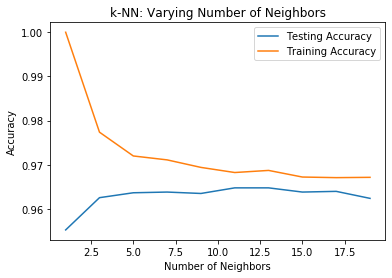

In [69]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()